Getting Twitter Data
We'll discuss the notebook for getting access to Twitter data. In this assignment, you'll identify a relevant aspect of Twitter data -- a theme, a meme, a hashtag, or a network of users -- and scrape some relevant data. In the next assignment, we'll discuss ways to analyze and visualize this kind of data.

1. Identify the element of Twitter data that you are interested in. What is significant about this element? (Bonus if you connect your element to Decoding the Social World.)

2. Write code to scrape a moderate amount of relevant data.

3. What variables in these data will you use to examine the element, and why?

4. Write code to produce a table or visualization of some aspect related to this element.

In [1]:
import pandas as pd
import numpy as np
import twitter as tw
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
import collections as cl

In [2]:
CONSUMER_KEY = 'GDzHFRHpXG8GmazEa686SWrW8'
CONSUMER_SECRET = 'ugtGSyqQZWLxehCCJu7fBQxPquWai1grAaPVANeOC0EMZSUvF1'
OAUTH_TOKEN = '62099456-hWeDi3BLYTm6is402uqrMYUcdhZJD2DmVpUfDdiAw'
OAUTH_TOKEN_SECRET = 'nvys4S2sORvS13iWbQhW2QRZ5KXaJze5u8T5UlJVhdJkT'

auth = tw.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = tw.Twitter(auth=auth)

In [3]:
def twitter_search(twitter_api, q, max_results=200, **kw):

    search_results = twitter_api.search.tweets(q=q, count=100, **kw)
    
    statuses = search_results['statuses']
    
    max_results = min(500, max_results)
    
    for _ in range(50):
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError as e:
            break
            
        kwargs = dict([ kv.split('=') 
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results: 
            break
            
    return statuses

In [4]:
# One of my projects this semester was about independently published tabletop games
# There's a really interesting subculture in the tabletop gaming sphere which I 
# hope will be shown with this scrape.

q = 'ttrpg' # The character '%23' gives you the hashtag: #.
tweet_data = twitter_search(twitter_api, q, max_results=1000)
tweet_df0 = pd.read_json(json.dumps(tweet_data))

q = 'dnd' # The character '%23' gives you the hashtag: #.
tweet_data = twitter_search(twitter_api, q, max_results=1000)
tweet_df1 = pd.read_json(json.dumps(tweet_data))

q = 'dungeons &amp; dragons' # The character '%23' gives you the hashtag: #.
tweet_data = twitter_search(twitter_api, q, max_results=1000)
tweet_df2 = pd.read_json(json.dumps(tweet_data))

q = 'roll20' # The character '%23' gives you the hashtag: #.
tweet_data = twitter_search(twitter_api, q, max_results=1000)
tweet_df3 = pd.read_json(json.dumps(tweet_data))

q = 'dice' # The character '%23' gives you the hashtag: #.
tweet_data = twitter_search(twitter_api, q, max_results=1000)
tweet_df4 = pd.read_json(json.dumps(tweet_data))

q = 'indie tabletop' # The character '%23' gives you the hashtag: #.
tweet_data = twitter_search(twitter_api, q, max_results=1000)
tweet_df5 = pd.read_json(json.dumps(tweet_data))

tweet_df = pd.concat((tweet_df0, tweet_df1, tweet_df2, tweet_df3, tweet_df4, tweet_df5), axis=0)
tweet_df = tweet_df[tweet_df['lang'] == 'en']

tweets = [ t.lower() 
         for tweet in tweet_df['text']
            for t in tweet.split('\n') ]

print(len(tweet_df))

1903


/Users/joanner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [5]:
tweet_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2020-05-22 05:20:30+00:00,"{'hashtags': [{'text': 'drinkinggames', 'indic...",NaN,0,False,NaN,1263701246638280704,1263701246638280704,...,NaN,NaN,NaN,3,False,{'created_at': 'Fri May 22 00:47:02 +0000 2020...,"<a href=""http://twitter.com/download/iphone"" r...",RT @LaughterHideous: Episode 93 - Do You Know ...,False,"{'id': 1034944821822144512, 'id_str': '1034944..."
1,NaN,NaN,2020-05-22 05:20:25+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1263701226807410721,1263701226807410688,...,NaN,NaN,NaN,21,False,{'created_at': 'Fri May 22 04:34:01 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",RT @LiliSparx: just caught up on Twitter and w...,False,"{'id': 1221858376029630464, 'id_str': '1221858..."
2,NaN,NaN,2020-05-22 05:19:26+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1263700980048318464,1263700980048318464,...,NaN,NaN,NaN,1064,False,{'created_at': 'Thu May 21 19:03:35 +0000 2020...,"<a href=""http://twitter.com/download/iphone"" r...",RT @sunshadeauarts: Giveaway time!\n\nI'm givi...,False,"{'id': 951462960408481793, 'id_str': '95146296..."
3,NaN,NaN,2020-05-22 05:19:16+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1,False,NaN,1263700938537099265,1263700938537099264,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",my little brother asked me to gm his first ttr...,False,"{'id': 1169402969411874816, 'id_str': '1169402..."
4,NaN,NaN,2020-05-22 05:18:56+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1263700851433992194,1263700851433992192,...,NaN,NaN,NaN,1064,False,{'created_at': 'Thu May 21 19:03:35 +0000 2020...,"<a href=""http://twitter.com/download/iphone"" r...",RT @sunshadeauarts: Giveaway time!\n\nI'm givi...,False,"{'id': 779890568365117440, 'id_str': '77989056..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NaN,NaN,2020-05-13 22:37:28+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,17,False,NaN,1260700719390302216,1260700719390302208,...,{'created_at': 'Mon May 11 17:08:25 +0000 2020...,1.259893e+18,1.259893e+18,10,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","The Locally Sourced Spring Bundle, a collectio...",True,"{'id': 1086128606487683072, 'id_str': '1086128..."
153,NaN,NaN,2020-05-13 22:17:06+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1260695591232905216,1260695591232905216,...,NaN,NaN,NaN,1,False,{'created_at': 'Wed May 13 22:16:47 +0000 2020...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @childofginevra: Hey tabletop peeps! Puttin...,False,"{'id': 4152548295, 'id_str': '4152548295', 'na..."
154,NaN,NaN,2020-05-13 22:16:47+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,10,False,NaN,1260695512359088130,1260695512359088128,...,NaN,NaN,NaN,1,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Hey tabletop peeps! Putting myself out there- ...,True,"{'id': 878832709703012354, 'id_str': '87883270..."
155,NaN,NaN,2020-05-13 19:06:48+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1260647702733312001,1260647702733312000,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://store.steampowered.com"" rel=""n...","Evil Cult\nStrategy, Indie, Casual, Turn-Based...",False,"{'id': 2971152149, 'id_str': '2971152149', 'na..."


In [6]:
tweet_df.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [8]:
# so in this analysis, I'll focus on words as opposed to stats. 
# I'll primarily be engaging with the 'text' column.
# This is because lots of DND users like to livetweet their sessions
# so I want to see if those sessions end up getting captured.

words0 = [ w.lower() 
          for t in tweets 
             for w in t.split () 
        ]
words1 = [w for w in words0 if len(w) > 3]
words = set(words1)
print(sorted(words))
len(words)

['"about', '"active"', '"ally', '"andrews', '"common', '"cre…', '"did', '"endless', '"fore"…', '"fo…', '"i\'m', '"leaders', '"look', '"lost', '"nothingtown:', '"perfect,', '"road"', '"rollable"', '"she', '"special', '"the', '"they', '"too', '"torvik"', '"ugh', '"win"', '"you', '#514_firstpage', '#51:', '#5e…', '#80spopculturechallenge', '#accessibility', '#actualplay', '#actualplaypodcast', '#adventure', '#aetherholmerpg', '#alienrpg', '#anxiety', '#appstore🎉', '#art', '#artistontwitter', '#artwork', '#bardlife', '#baseballbat', '#blinks', '#bloodhunter', '#books', '#breathofthewild', '#casual,', '#cataclysm', '#citiesofmyth:', '#commissionsopen', '#community', '#contentcreator', '#creative', '#criticalrole', '#criticalroleart', '#criticalro…', '#critters', '#critters,', '#crit…', '#cteam', '#cyberpunkart', '#d&amp;d', '#d&amp;d…', '#ddal', '#deadlands', '#dice', '#dice?', '#diceaddict', '#dicecollection', '#dicemaking', '#dicemaniac', '#diceset', '#dms,', '#dnd', '#dnd,', '#dnd.', '#d

5444

In [9]:
pip install nltk

     |████████████████████████████████| 1.4 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 4.2 MB/s  eta 0:00:01
     |████████████████████████████████| 696 kB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.7 MB/s eta 0:00:01
    Running setup.py install for regex ... done
    Running setup.py install for nltk ... done
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import nltk

In [12]:
dnd_eng = tweet_df[tweet_df['lang'] == 'en']
dnd_eng['text'].head(100)

0      RT @LaughterHideous: Episode 93 - Do You Know ...
1      RT @LiliSparx: just caught up on Twitter and w...
2      RT @sunshadeauarts: Giveaway time!\n\nI'm givi...
3      my little brother asked me to gm his first ttr...
4      RT @sunshadeauarts: Giveaway time!\n\nI'm givi...
                             ...                        
96     RT @JenGarringer999: @RollBritannia Hilarity e...
97     RT @LiliSparx: just caught up on Twitter and w...
98     RT @GilaRPGs: That feeling where you are makin...
99     RT @HealthPakStream: I realized, when writing ...
100    RT @EVERYTHINGDICE: GIVEAWAY✨THE TERROR, in gr...
Name: text, Length: 100, dtype: object

Text(0.5, 1.0, 'Word Distribution in Tabletop Tweets')

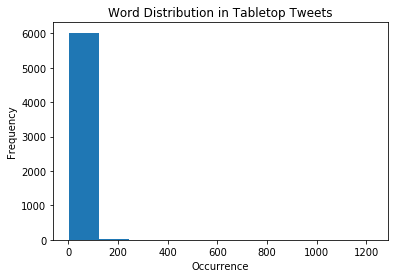

In [13]:
words2 = [ w.lower() 
         for t in dnd_eng['text'] 
            for w in t.split () ]
count = cl.Counter(words2)
plt.hist(count.values())
plt.ylabel('Frequency')
plt.xlabel('Occurrence')
plt.title('Word Distribution in Tabletop Tweets')

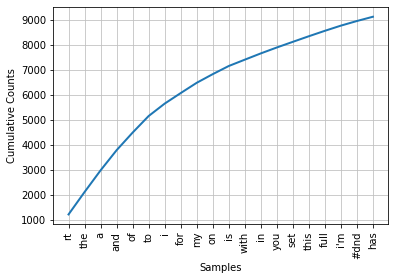

In [14]:
dnd_freq = nltk.FreqDist(words2)
dnd_freq.plot(20, cumulative=True)

In [16]:
COMFORT = set([
             'comfort', 'comfortable', 'cheer', 'consolation', 'relief', 'solace' 
])

EXCITE = set([
              'excitement', 'appetite', 'ardor', 'avidity', 'avidness', 'desirousness', 
              'eagerness', 'enthusiasm', 'hunger', 'impatience', 'keenness', 'lust', 
              'thirst'
])

ACCOMPLISH = set([
                  'accomplishment', 'achievement', 'acquirement', 'attainment', 
                  'success', 'triumph', 'succeed', 'achieve', 'acquire', 'attain'
])

PEACE = set([
             'peace', 'peaceful', 'calm', 'calmness', 'heartsease', 'peacefulness', 
             'placidity', 'sereneness', 'serenity', 'tranquillity', 'tranquility',
             'content', 'contentedness', 'contentment'
])

BEAUTY = set([
              'aesthetics', 'esthetics', 'attractiveness', 'beauteousness', 
              'beautifulness', 'comeliness', 'cuteness', 'fairness', 'gorgeousness', 
              'handsomeness', 'looks', 'loveliness', 'prettiness', 'sightliness',
              'beautiful', 'lovely', 'attractive', 'cute', 'gorgeous', 'handsome',
              'pretty', 'beauty'
])

EQUALITY = set([
                'detachment', 'disinterest', 'disinterestedness', 'evenhandedness', 
                'fair-mindedness', 'fairness', 'impartiality', 'justice', 
                'neutralism', 'neutrality', 'nonpartisanship', 'objectiveness', 
                'objectivity', 'equality'
])

SECURITY = set([
                'protection', 'safeness', 'safety', 'secure', 'security'
])

FREEDOM = set([
               'autonomy', 'independence', 'independency', 'liberty', 'self-determination', 
               'self-governance', 'self-government', 'sovereignty', 'freedom', 'free'
])

HAPPINESS = set([
                 'beatitude', 'blessedness', 'bliss', 'blissfulness', 'felicity', 
                 'gladness', 'joy', 'happy', 'happiness', 'blissful', 'joyous' 
])

HARMONY = set([
               'comity', 'compatibility', 'concord', 'harmony', 'harmonious'
])

LOVE = set([
            'affection', 'attachment', 'devotedness', 'devotion', 'fondness', 'passion',
            'affectionate', 'devoted', 'fond', 'passionate', 'sweetheart'
])

PLEASURE = set([
               'delectation', 'delight', 'enjoyment', 'gladness', 'gratification', 
                'relish', 'satisfaction', 'delightful', 'enjoyable', 'pleasure', 'pleasurable',
                'gratifying'
])

SALVATION = set([
                 'deliverance', 'rescue', 'saved', 'innocent', 'innocence', 'salvation'
                 'guiltless', 'redeemed', 'atoned'
])

SELFRESPECT = set([
                   'ego', 'pride', 'pridefulness', 'self-esteem', 'self-regard'
                   'esteem', 'respect'
])

RECOGNITION = set([
                   'celebrity', 'notoriety', 'renown', 'fame', 'famous', 'respected', 
                   'popular', 'popularity', 'recognition', 'recognized'
])

FRIENDSHIP = set([
                  'amity', 'benevolence', 'brotherhood', 'charity', 'cordiality', 
                  'cordialness', 'fellowship', 'friendliness', 'good-fellowship', 
                  'goodwill', 'kindliness', 'neighborliness', 'friend', 'friends'
                  'friendship'
])

WISDOM = set([
              'discernment', 'insight', 'perception', 'perceptiveness', 'perceptivity', 
              'sagaciousness', 'sagacity', 'sageness', 'sapience', 'wisdom', 'wise'
])

comfort_total = len(COMFORT.intersection(words))
excite_total = len(EXCITE.intersection(words))
accomplish_total = len(ACCOMPLISH.intersection(words))
peace_total = len(PEACE.intersection(words))
beauty_total = len(BEAUTY.intersection(words))
equality_total = len(EQUALITY.intersection(words))
security_total = len(SECURITY.intersection(words))
freedom_total = len(FREEDOM.intersection(words))
happy_total = len(HAPPINESS.intersection(words))
harmony_total = len(HARMONY.intersection(words))
love_total = len(LOVE.intersection(words))
pleasure_total = len(PLEASURE.intersection(words))
salvation_total = len(SALVATION.intersection(words))
selfrespect_total = len(SELFRESPECT.intersection(words))
recognition_total = len(RECOGNITION.intersection(words))
friendship_total = len(FRIENDSHIP.intersection(words))
wisdom_total = len(WISDOM.intersection(words))

totals = [comfort_total, excite_total,accomplish_total, peace_total, beauty_total, equality_total, security_total, freedom_total, happy_total, harmony_total, love_total, pleasure_total, salvation_total, selfrespect_total, recognition_total, friendship_total, wisdom_total]


In [17]:
totals

[1, 1, 1, 2, 5, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1]

In [18]:
ASSERTIVE_TERMS = set([
                    'am', 'are', 'is', 'was', 'were', 'affirm',
                    'allege', 'assert', 'forecast', 'predict', 'announce',
                    'insist', 'declare', 'state', 'propose',
                    'propound', 'maintain', 'contend', 'avow', 'warrant',
                    'believe', 'argue', 'aver', 'avouch', 'guarantee', 'profess',
                    'plead', 'reason', 'purport', 'claim', 'explain', 'proclaim' 
])
DIRECTIVE_TERMS = set([
                    'command', 'demand', 'forbid', 'recommend', 'order',
                    'decree', 'enact', 'direct', 'enjoin', 'instruct',
                    'compel', 'prohibit', 'dictate', 'require', 'mandate',
                    'require'
])
COMMISSIVE_TERMS = set([
                    'offer', 'promise', 'swear', 'volunteer', 'vow', 'pledge',
                    'attest', 'engage', 'troth'
])
EVALUATIVE_TERMS = set([
                     'thank', 'congratulate', 'pardon', 'excuse', 'blame', 
                     'praise', 'condolence', 'accuse', 'apologize',
                     'commiserate', 'approve', 'admire', 'commend', 'compliment',
                     'applaud',  'object', 'lament', 'condemn', 'admonish',
                     'reprove', 'rebuke', 'chastise', 'impeach', 'denounce',
                     'bless', 'glorify', 'acclaim', 'cheer', 'salute', 'censure',
                     'excoriate', 'chide', 'castigate', 'scold', 'reprehend',
])
ROGATIVE_TERMS = set([
                      'ask', 'inquire', 'question', 'query', 'beg', 'request',
                      'implore', 'beseech', 'petition', 'solicit', 'entreat',
                      'supplicate'
])

assertive_terms_len = len(ASSERTIVE_TERMS.intersection(words))
directive_terms_len = len(DIRECTIVE_TERMS.intersection(words))
commissive_terms_len = len(COMMISSIVE_TERMS.intersection(words))
evaluative_terms_len = len(EVALUATIVE_TERMS.intersection(words))
rogative_terms_len = len(ROGATIVE_TERMS.intersection(words))

illacts = [assertive_terms_len, directive_terms_len, commissive_terms_len, evaluative_terms_len, rogative_terms_len]
print(illacts)


[6, 2, 0, 2, 0]


In [19]:
ASSERTIVE_TERMS.intersection(words)

{'announce', 'believe', 'declare', 'reason', 'state', 'were'}

In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joanner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
from nltk.tokenize import word_tokenize 

In [24]:
stops = set(stopwords.words('english'))   
swremoved = stops.intersection(words)
  
filtered_words = [] 
  
for w in words: 
    if w not in stops: 
        filtered_words.append(w)
        
print(filtered_words)

['demand', '@sammyashl3y:', 'twitter', 'icymi:', 'mess', 'https://t.co/qtprvkyf9a', 'https://t.co/godivzibm9', 'yamuna', '@arcanistpress:', '2014', 'fossil', "tuesday's", 'recording', 'charcoal', 'sasara:', 'resin', 'huge', '@filmfare', '@long_spider:', '#twitch', 'state', '@sonicvaughn:', 'theros', 'multiclass,', 'passionate', 'rough', 'call', 'handle', 'evolute', 'safest', 'mines', '@matthewwforeman:', 'spell.', 'alter', 'https://t.co/jalyuryfmi', 'within', 'assassin', '...”', 'demi', '@doc_roll20', "we're", 'saving', 'cast', 'boundaries?', 'question:', 'race', 'knight', 'panic,', 'https://t.co/zbnnqjxqgt', '@alunrees14', 'https://t.co/smrdluklmq', 'risky', 'otherwise,', 'linked', '🌟🧙\u200d♂️👉check', 'basic', 'dirty', 'calling', 'urge', '#dungeonsandd…', 'room', 'stats', 'unearthed', 'chrome', '#cteam', '"endless', '@talonclaw2:', 'https://t.co/on290wgqbp', 'like…', 'released', 'setting', 'days', 'revivify', 'advertising', 'https://t.co/xdp0terdje', 'but…', '@kawaiiness', 'skills', '

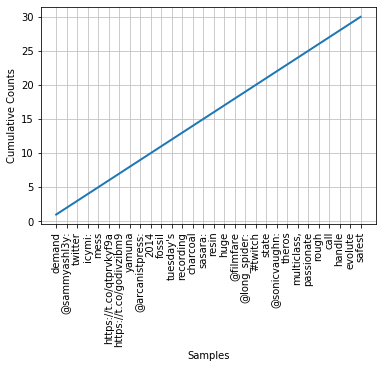

In [26]:
udnd_freq = nltk.FreqDist(filtered_words)
udnd_freq.plot(30, cumulative=True)

In [ ]:
# As a bit of a note, I'm actually really surprised that I'm seeing dicemaking-related words
# I'm not surprised that there are a lot of "actual play" related words (recording, twitch)
# I'm also not surprised that there aren't many words related to indie ttrpgs--
# it's a fairly small community, and they don't tweet that often.